# Causal inference between Epidemic time series

In [1]:
from pysus.online_data import SINAN
import pandas as pd
import numpy as np
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/home/fccoelho/.local/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


## Obtaining the Data
We will use [PySUS library](https://pysus.readthedocs.io) to download time series of cases of malaria and dengue for the state of Amazonas, Brazil.

In [3]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Chagas',
 'Colera',
 'Coqueluche',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica']

### Malaria Incidence
Malaria cases are mainly reported on SIVEP-Malaria, not on SINAN. Therefore the few cases that end up in SINAN are not enough for reconstructing its temporal dynamics.

In [4]:
SINAN.get_available_years('AM', 'Malaria')

['MALAAM07.dbc',
 'MALAAM08.dbc',
 'MALAAM09.dbc',
 'MALAAM10.dbc',
 'MALAAM11.dbc',
 'MALAAM12.dbc',
 'MALAAM13.dbc',
 'MALAAM14.dbc',
 'MALAAM15.dbc',
 'MALAAM16.dbc',
 'MALAAM17.dbc']

In [16]:
maldf = df = SINAN.download('AM',2007,'Malaria')
for ano in range(2008,2020):
    print(f"Downloading {ano} year")
    try:
        df = SINAN.download('AM',ano,'Malaria')
        maldf = pd.concat([maldf, df])
    except:
        print(f"Download of {ano} failed")

Download of 2018 failed
Download of 2019 failed


In [17]:
maldf

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,COMUNINF,LOC_INF,DEXAME,RESULT,PMM,PCRUZ,TRA_ESQUEM,DSTRAESQUE,DTRATA,DT_ENCERRA
0,2,B54,2007-01-12,200702,2007,22,220370,,2650770,2007-01-08,...,130260,,2007-01-12,4,20.0,4,2,,2007-01-12,None
1,2,B54,2007-01-11,200702,2007,23,231410,1523,2725053,2007-01-11,...,130356,RIO,2007-01-11,1,NaN,,,,None,None
2,2,B54,2007-01-11,200702,2007,23,231410,1523,2725053,2007-01-11,...,130356,RIO,2007-01-11,1,NaN,,,,None,None
3,2,B54,2007-01-10,200702,2007,23,231410,1523,2725053,2007-01-02,...,130356,RIO,2007-01-10,4,200.0,2,1,,2007-01-10,None
4,2,B54,2007-01-11,200702,2007,23,231410,1523,2725053,2007-01-11,...,130356,RIO,2007-01-11,1,NaN,,,,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2,B54,2017-12-18,201751,2017,31,310620,1449,3314014,2017-12-15,...,,,2017-12-18,1,NaN,,,,None,None
51,2,B54,2017-12-20,201751,2017,41,411520,1369,6986609,2017-12-16,...,150140,NAO,2017-12-20,4,11000.0,5,99,CLOROQUINA E PRIMAQUINA ESQUEM,2017-12-20,None
52,2,B54,2017-12-26,201752,2017,23,231375,1515,2562162,2017-12-20,...,130260,,2017-12-26,6,NaN,1,,,2017-12-26,None
53,2,B54,2017-12-26,201752,2017,23,231375,1515,2562162,2017-12-20,...,130260,,2017-12-26,7,NaN,2,,,2017-12-26,None


In [18]:
for c in maldf.columns:
    if c.startswith('DT_'):
        maldf[c] = pd.to_datetime(maldf[c])

In [19]:
maldf.set_index('DT_SIN_PRI', inplace=True)

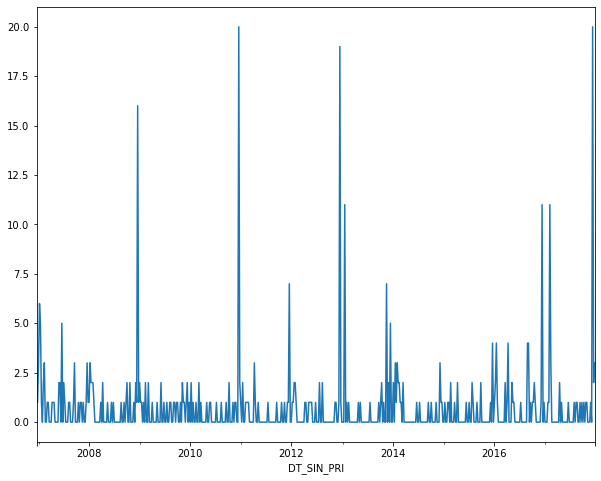

In [20]:
maldf.resample('W').count().TP_NOT.plot();

#### SIVEP Malaria series
Luckily we have the weekly cases of malaria from SIVEP as a file

In [21]:
malsivep = pd.read_csv('mal_inc_AM.csv.gz')
malsivep

,DT_SINTO,COD_NOTI
0,2003-01-05,1888
1,2003-01-12,4701
2,2003-01-19,2186
3,2003-01-26,2109
4,2003-02-02,2176
...,...,...
932,2020-11-15,0
933,2020-11-22,0
934,2020-11-29,0
935,2020-12-06,821


In [22]:
malsivep.set_index('DT_SINTO', inplace=True)

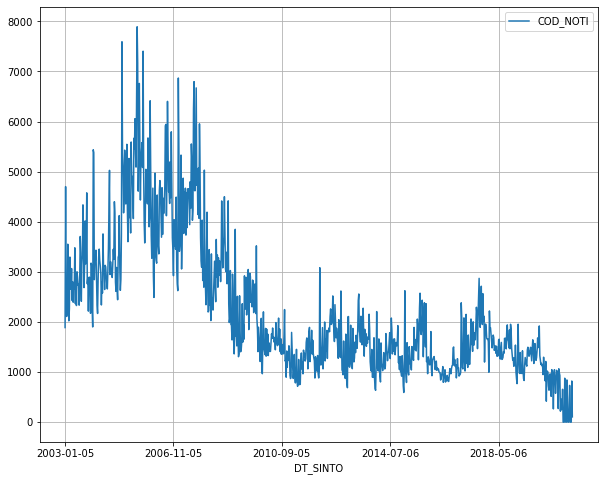

In [23]:
malsivep.plot(grid=True);

The malaria series is quite noisy let's smooth it a little

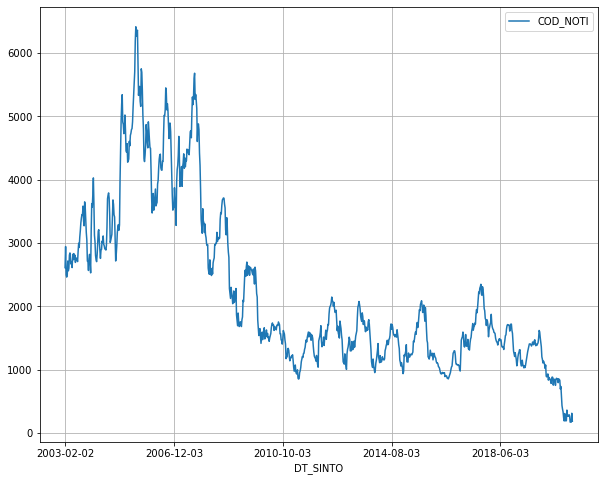

In [24]:
malsivep.rolling(5).mean().dropna().plot(grid=True);

### Dengue Incidence

In [25]:
SINAN.get_available_years('AM', 'Dengue')

['DENGAM13.dbc',
 'DENGAM14.dbc',
 'DENGAM15.dbc',
 'DENGAM16.dbc',
 'DENGAM17.dbc',
 'DENGAM18.dbc',
 'DENGAM19.dbc']

In [26]:
dendf = df = SINAN.download('AM',2013,'Dengue')
for ano in range(2013,2020):
    print(f"Downloading {ano} year")
    df = SINAN.download('AM',ano,'Dengue')
    dendf = pd.concat([dendf, df])

In [27]:
for c in dendf.columns:
    if c.startswith('DT_'):
        dendf[c] = pd.to_datetime(dendf[c])

In [28]:
dendf

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,CS_FLXRET,FLXRECEBI
0,2,A90,2013-01-05,201301,2013,12,120040,1938,2001527,2013-01-02,...,,,,,,,,,2,2
1,2,A90,2013-01-05,201301,2013,12,120040,1938,2001578,2013-01-03,...,,,,,,,,,2,2
2,2,A90,2013-01-06,201302,2013,12,120040,1938,6439837,2013-01-03,...,,,,,,,,,1,2
3,2,A90,2013-02-16,201307,2013,12,120040,1938,6439837,2013-02-02,...,,,,,,,,,1,2
4,2,A90,2013-03-07,201310,2013,12,120020,1941,2002116,2013-03-01,...,,,,,,,,,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,2,A90,2019-05-14,201920,2019,13,130353,5584,2013320,2019-05-08,...,,,,,,,2,,0,
7633,2,A90,2019-05-17,201920,2019,13,130353,5584,2013320,2019-05-12,...,,,,,,,2,,0,
7634,2,A90,2019-05-30,201922,2019,13,130353,5584,2013320,2019-05-23,...,,,,,,,2,,0,
7635,2,A90,2019-05-22,201921,2019,13,130353,5584,2013320,2019-05-17,...,,,,,,,2,,0,


In [29]:
dendf.set_index('DT_SIN_PRI', inplace=True)

In [30]:
dendf['NU_ANO'] = pd.to_numeric(dendf.NU_ANO, errors='coerce', downcast='unsigned')

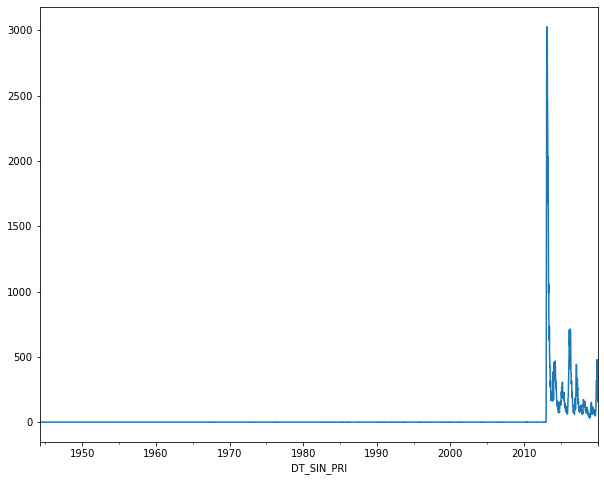

In [31]:
dendf.resample('W').count().TP_NOT.plot();

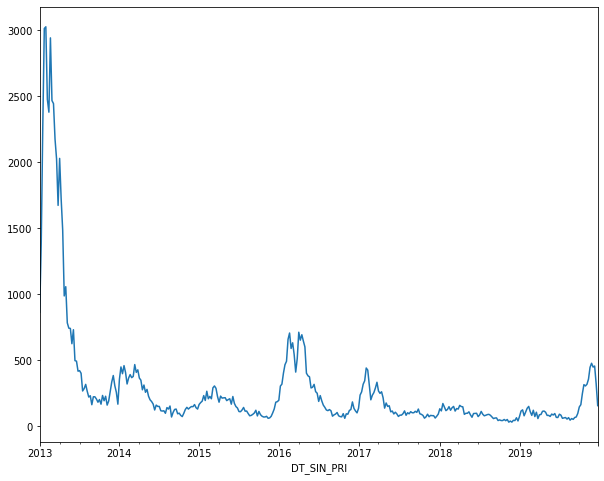

In [32]:
dengueseries = dendf.loc['2013-01-01':].resample('W').count().TP_NOT
dengueseries.plot();

## Looking at the correlation between the series
The dengue series is shorter. so we will need to cut the malaria series to make it match the dengue series.

In [33]:
dengueseries.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='DT_SIN_PRI', length=365, freq='W-SUN')

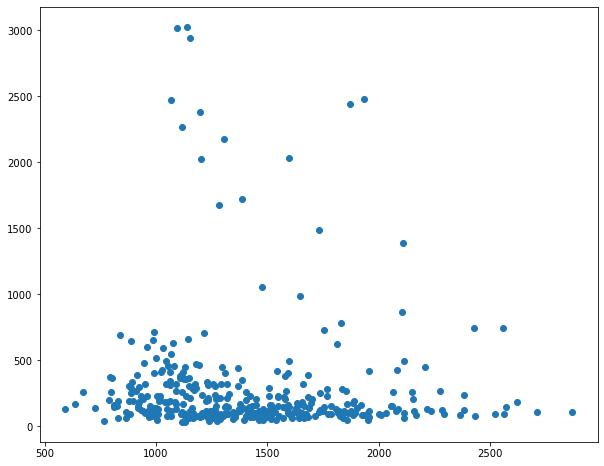

In [34]:
pylab.scatter(malsivep.loc['2013-01-01':'2019-12-29'].values, dengueseries.values);

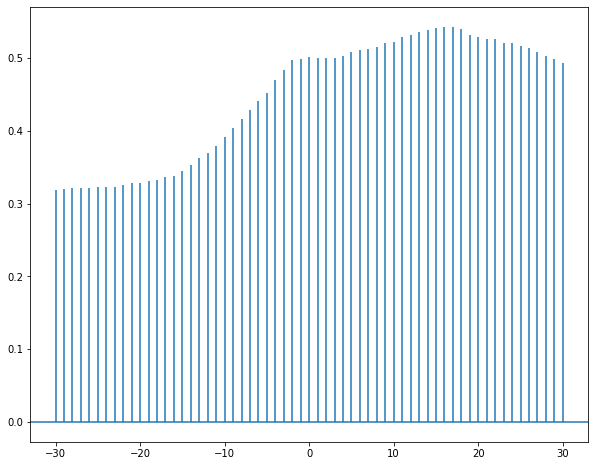

In [35]:
pylab.xcorr(malsivep.loc['2013-01-01':'2019-12-29'].values[:,0], dengueseries.astype(float).values,maxlags=30);

In [36]:
from statsmodels.tsa.stattools import grangercausalitytests

In [37]:
grangercausalitytests(np.array([malsivep.loc['2013-01-01':'2019-12-29'].values[:,0],dengueseries.astype(float).values]).T, maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3682  , p=0.5444  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.3712  , p=0.5423  , df=1
likelihood ratio test: chi2=0.3710  , p=0.5424  , df=1
parameter F test:         F=0.3682  , p=0.5444  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2502  , p=0.2877  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=2.5353  , p=0.2815  , df=2
likelihood ratio test: chi2=2.5265  , p=0.2827  , df=2
parameter F test:         F=1.2502  , p=0.2877  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0740  , p=0.3601  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=3.2854  , p=0.3497  , df=3
likelihood ratio test: chi2=3.2706  , p=0.3518  , df=3
parameter F test:         F=1.0740  , p=0.3601  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8895  , p=0.4703  

{1: ({'ssr_ftest': (0.3681500468556421, 0.5443957718063315, 361.0, 1),
   'ssr_chi2test': (0.37120946552757267, 0.5423457428284897, 1),
   'lrtest': (0.371020313254121, 0.5424486346539008, 1),
   'params_ftest': (0.368150046864142, 0.5443957718017018, 361.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.2501921051851124, 0.2876972805298683, 358.0, 2),
   'ssr_chi2test': (2.5353057775541665, 0.2814915389761831, 2),
   'lrtest': (2.5264931023129975, 0.2827346224456898, 2),
   'params_ftest': (1.2501921051847602, 0.2876972805299665, 358.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0739623159651799, 0.36009924650511427, 355.0, 3),
   'ssr_chi2test': (3.2854171130653107, 0.3496774737918125, 3),
   'lrtest': (3.270597916731276, 0.35175587648902645, 3),
   'params_ftest': (1.0739623159669274, 0.3600992465043734, 355.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [21]:
grangercausalitytests(np.array([dengueseries.astype(float).values,malsivep.loc['2013-01-01':'2019-12-29'].values[:,0]]).T, maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9973  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9973  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9973  , df=1
parameter F test:         F=0.0000  , p=0.9973  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2735  , p=0.0390  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=6.6384  , p=0.0362  , df=2
likelihood ratio test: chi2=6.5784  , p=0.0373  , df=2
parameter F test:         F=3.2735  , p=0.0390  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9581  , p=0.0085  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=12.1084 , p=0.0070  , df=3
likelihood ratio test: chi2=11.9103 , p=0.0077  , df=3
parameter F test:         F=3.9581  , p=0.0085  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5910  , p=0.0069  

{1: ({'ssr_ftest': (1.125291919353072e-05, 0.9973253245747965, 361.0, 1),
   'ssr_chi2test': (1.1346433757465878e-05, 0.997312373397191, 1),
   'lrtest': (1.1346432984282728e-05, 0.9973123734887624, 1),
   'params_ftest': (1.1252919032498334e-05, 0.997325324593849, 361.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.2734769921914273, 0.03901125854665806, 358.0, 2),
   'ssr_chi2test': (6.638391889192671, 0.03618191232340376, 2),
   'lrtest': (6.578421858994261, 0.037283256910667965, 2),
   'params_ftest': (3.273476992191403, 0.039011258546658614, 358.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.9580980680048428, 0.008498895621108369, 355.0, 3),
   'ssr_chi2test': (12.108435216488052, 0.007020789171102689, 3),
   'lrtest': (11.910334782608516, 0.007696713043022898, 3),
   'params_ftest': (3.95809806800486, 0.008498895621108164, 355.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
 

## Applying Convergent Cross-Mapping
Let's start applying the CCM method by testing the malaria $\rightarrow$ dengue causality.

In [38]:
import neurokit2 as nk

{'delay': 8, 'dimension': 6, 'r': 362.83068564926}

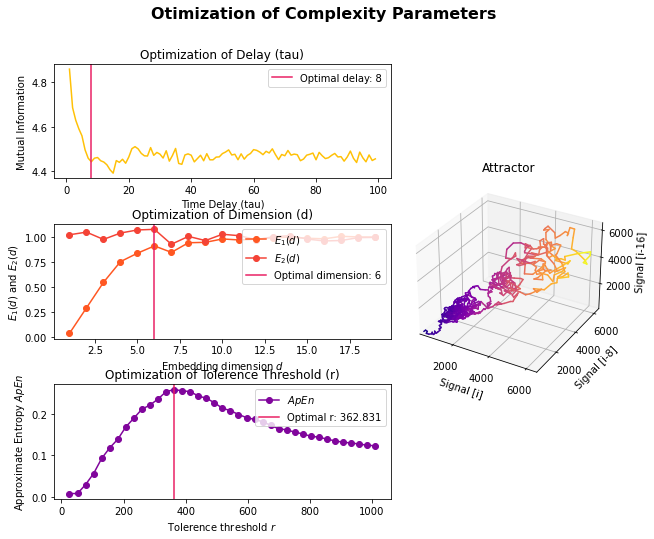

In [39]:
parameters = nk.complexity_optimize(malsivep.rolling(5).mean().dropna().values[:,0], show=True)
parameters

Although we have estimated the parameters for reconstruction from the entire malaria series, for training the predictive model, we need to slice the series to the same period as the dengue series.

In [40]:
malseries = malsivep.loc['2013-01-01':'2019-12-29']
malrec = pd.DataFrame(data={'mal':malseries.values[:,0]})
tau = 8
malrec['lag1'] = malrec.mal.shift(1*tau)
malrec['lag2'] = malrec.mal.shift(2*tau)
malrec['lag3'] = malrec.mal.shift(3*tau)
malrec['lag4'] = malrec.mal.shift(4*tau)
malrec['lag5'] = malrec.mal.shift(5*tau)
malrec = malrec.dropna()
malrec

,mal,lag1,lag2,lag3,lag4,lag5
40,1859,1547.0,2114.0,1646.0,1066.0,2103.0
41,1206,1768.0,1958.0,1475.0,1871.0,2108.0
42,1064,1513.0,1544.0,1830.0,1305.0,1118.0
43,1019,1683.0,1595.0,2429.0,1202.0,1096.0
44,1451,1575.0,2274.0,2558.0,1282.0,1141.0
...,...,...,...,...,...,...
360,948,1569.0,1518.0,1445.0,1227.0,989.0
361,1296,1920.0,1569.0,1494.0,1153.0,970.0
362,1079,1327.0,1397.0,1354.0,1117.0,1424.0
363,953,1236.0,1233.0,1223.0,1443.0,1051.0


In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score

In [42]:
n_neighbors = 3
X = malrec[['mal','lag1','lag2', 'lag3','lag4','lag5']]
y = dengueseries[5*tau:]
knn = KNeighborsRegressor(n_neighbors, weights='distance', metric='euclidean')
knn.fit(X.iloc[:200], y[:200])
y_ = knn.predict(X.iloc[200:])

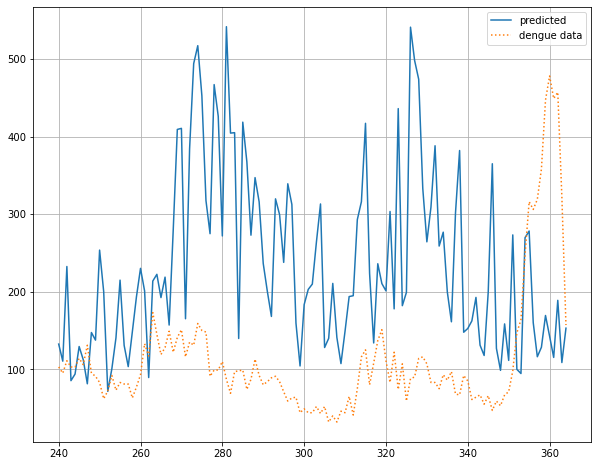

In [43]:
pylab.plot(X.index[200:],y_, label='predicted')
pylab.plot(X.index[200:],y[200:],':',label='dengue data')
pylab.grid()
pylab.legend();

In [44]:
knn.score(X.iloc[200:],y[200:])

-4.137688396874518

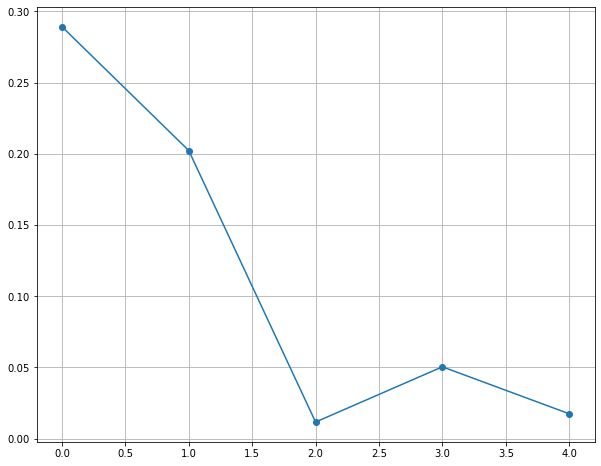

In [45]:
def CCM(X,y, L=[50,100,150,200,250]):
    scores = []
    for l in L:
        knn = KNeighborsRegressor(n_neighbors, weights='distance', metric='euclidean')
        knn.fit(X.iloc[:l], y[:l])
        y_ = knn.predict(X.iloc[l:l+100])
        scores.append(np.corrcoef(y[l:l+100],y_)[0,1]**2)
    return scores
        
scores = CCM(X,y)
pylab.plot(scores,'o-');
pylab.grid()

### Adding water level series

In [46]:
nivagua = pd.read_csv('cotas.csv')
nivagua

,EstacaoCodigo,NivelConsistencia,Data,Hora,MediaDiaria,TipoMedicaoCotas,Maxima,Minima,Media,DiaMaxima,...,Cota22Status,Cota23Status,Cota24Status,Cota25Status,Cota26Status,Cota27Status,Cota28Status,Cota29Status,Cota30Status,Cota31Status
0,14980000,1,01/02/2014,01/01/1900 07:00:00,0,1,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14980000,1,01/02/2014,01/01/1900 17:00:00,0,1,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14980000,1,01/02/2014,NaN,1,1,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14980000,1,01/01/2014,01/01/1900 07:00:00,0,1,198.0,136.0,142.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,14980000,1,01/01/2014,01/01/1900 17:00:00,0,1,198.0,136.0,142.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,14980000,2,01/11/2000,NaN,1,1,175.0,133.0,140.0,6.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
645,14980000,2,01/08/2000,NaN,1,1,148.0,148.0,148.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
646,14980000,2,01/07/2000,NaN,1,1,154.0,148.0,148.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
647,14980000,2,01/06/2000,NaN,1,1,148.0,147.0,148.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [47]:
nivagua['Data'] = pd.to_datetime(nivagua.Data)

In [48]:
nivagua.set_index('Data',inplace=True)

<AxesSubplot:xlabel='Data'>

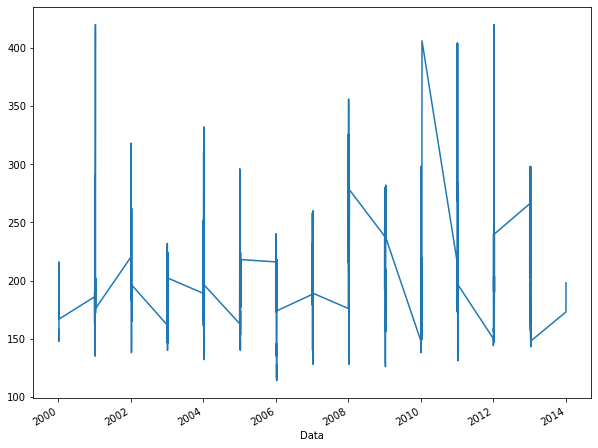

In [51]:
nivagua.Maxima.dropna().plot()

### Loading Rain series 
To check for causality from rain$\rightarrow$disease, we have obtained a 10-year series of precipitation in Manaus.

<AxesSubplot:>

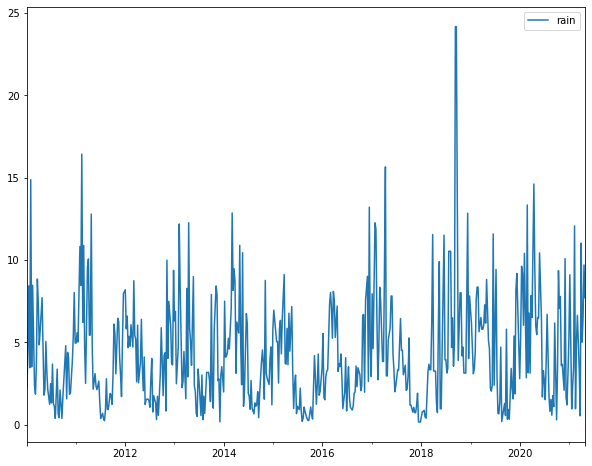

In [15]:
rain = pd.read_parquet('manaus_rain_2010_21.parquet')
rain.plot();

Let's start by checking for correlation between rain and the two diseases we have.

First for dengue.

In [48]:
dengueseries.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', name='DT_SIN_PRI', length=365, freq='W-SUN')

Text(0, 0.5, 'dengue cases')

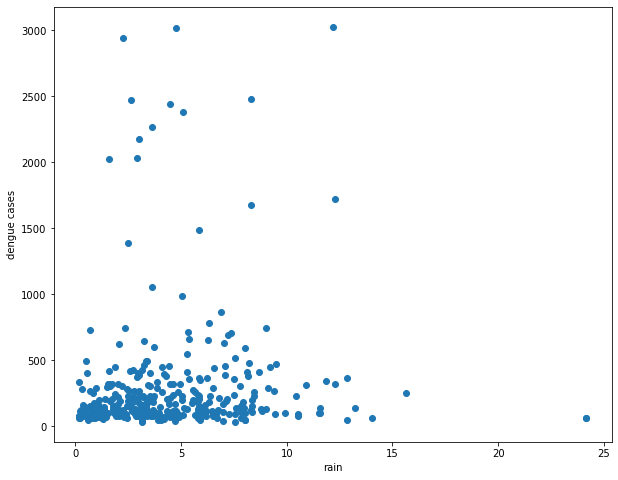

In [53]:
pylab.scatter(rain.loc['2013-01-06':'2019-12-29'].values[:,0], dengueseries[:-1])
pylab.xlabel('rain')
pylab.ylabel('dengue cases')

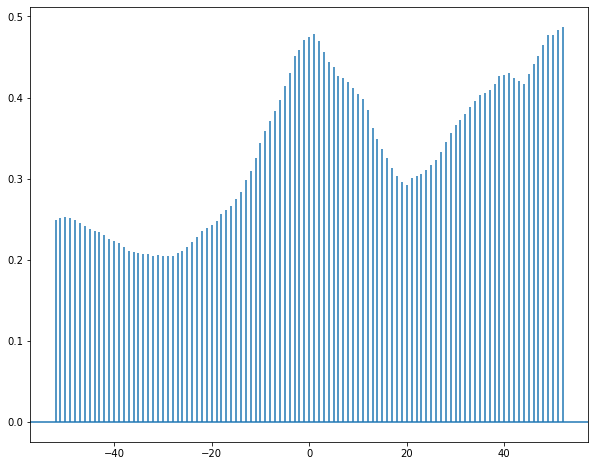

In [56]:
pylab.xcorr(rain.loc['2013-01-06':'2019-12-29'].values[:,0], dengueseries[:-1],maxlags=52);

Now for Malaria.

Text(0, 0.5, 'malaria cases')

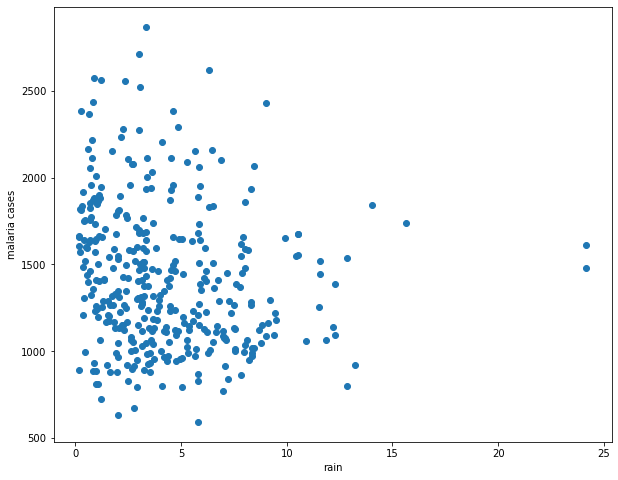

In [57]:
pylab.scatter(rain.loc['2013-01-06':'2019-12-29'].values[:,0], malseries[:-1])
pylab.xlabel('rain')
pylab.ylabel('malaria cases')

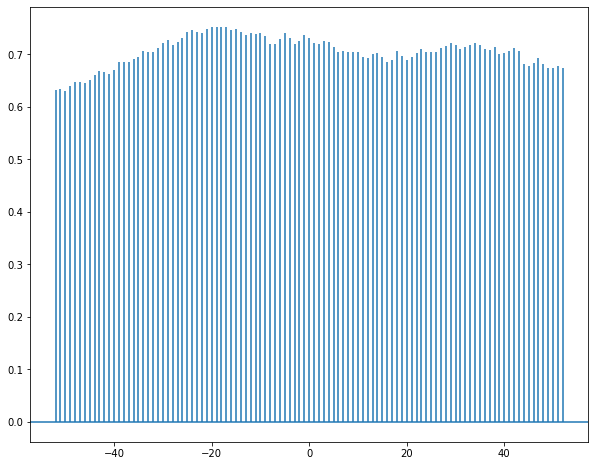

In [61]:
pylab.xcorr(rain.loc['2013-01-06':'2019-12-29'].values[:,0], malseries.values[:-1,0],maxlags=52);

(365, 1)